**Multiple Regression
https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

In [73]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [49]:
import pandas as pd
df = pd.read_csv('./total_pd-database.csv', index_col=0)

In [50]:
columns = list(df)
columns

['Sex',
 'Age',
 'ICV',
 'Disease_Duration',
 'UPDRS_III_Inverted',
 'Animal_fluency',
 'Letter_S_fluency',
 'AQT_Inverted',
 'MMSE',
 'LEDD',
 'left_caudate_first',
 'right_caudate_first',
 'left_putamen_first',
 'right_putamen_first',
 'left_thalamus_first',
 'right_thalamus_first']

In [51]:
df.head()

,Sex,Age,ICV,Disease_Duration,UPDRS_III_Inverted,Animal_fluency,Letter_S_fluency,AQT_Inverted,MMSE,LEDD,left_caudate_first,right_caudate_first,left_putamen_first,right_putamen_first,left_thalamus_first,right_thalamus_first
ID,,,,,,,,,,,,,,,,
P001,0,74.49,1550689,1.0,-12,28.0,14.0,-47.0,30,639.6,3914,4127,5492,5749,7696,8156
P003,1,63.54,1381030,4.0,-6,25.0,18.0,-58.0,30,348.0,3058,2899,4117,4292,7203,6961
P005,0,70.89,1552848,16.0,-5,18.0,11.0,-68.0,28,1331.0,3458,3804,4956,4904,8117,8010
P006,0,74.44,1451945,2.0,-9,16.0,11.0,-88.0,26,400.0,3058,3300,3969,3549,7508,6578
P007,0,63.49,1679794,5.0,-9,29.0,17.0,-54.0,30,125.0,3393,3320,6135,5932,8711,8124


In [70]:
model = ols("""Animal_fluency ~ left_caudate_first
            + ICV
            + Age""", data=df).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Animal_fluency   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.968
Date:                Fri, 31 Jul 2020   Prob (F-statistic):             0.0380
Time:                        16:21:05   Log-Likelihood:                -240.24
No. Observations:                  72   AIC:                             488.5
Df Residuals:                      68   BIC:                             497.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             35.9798     13.051      2.757      0.007       9.936      62.023
left_caudate_first     0.0040      0.002      1.890      0.063      -0.000       0.008
ICV                -9.624e-06   7.21e-06     -1.334      0.186    -2.4e-05    4.77e-06
Age                   -0.2124      0.140     -1.516      0.134      -0.492       0.067
==============================================================================
Omnibus:                        0.620   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.692
Skew:                           0.207   Prob(JB):                        0.708
Kurtosis:                       2.758   Cond. No.                     2.36e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

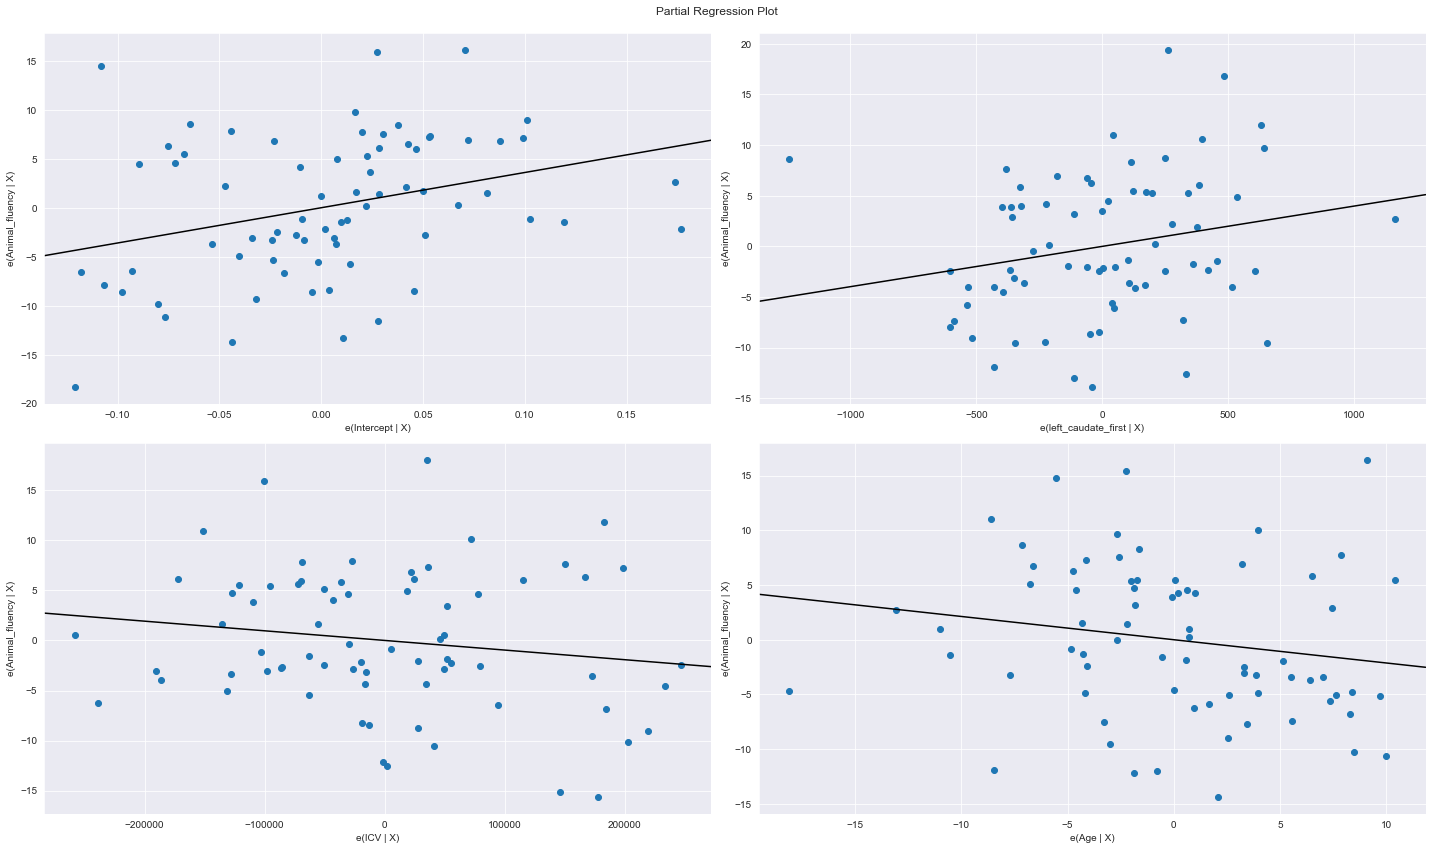

In [71]:
fig = plt.figure(figsize=(20, 12))

fig = sm.graphics.plot_partregress_grid(model, fig=fig)

Here we can see that our model shows that caudate volumes, ICV and Age can predict performance on the animal fluency test.

In [68]:
model = ols("""Animal_fluency ~ right_caudate_first
            + ICV
            + Age""", data=df).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Animal_fluency   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     3.846
Date:                Fri, 31 Jul 2020   Prob (F-statistic):             0.0133
Time:                        16:20:34   Log-Likelihood:                -239.02
No. Observations:                  72   AIC:                             486.0
Df Residuals:                      68   BIC:                             495.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              34.8047     12.742      2.731      0.008       9.378      60.231
right_caudate_first     0.0055      0.002      2.454      0.017       0.001       0.010
ICV                 -1.109e-05   6.91e-06     -1.604      0.113   -2.49e-05     2.7e-06
Age                    -0.2469      0.132     -1.875      0.065      -0.510       0.016
==============================================================================
Omnibus:                        0.198   Durbin-Watson:                   2.269
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.387
Skew:                           0.060   Prob(JB):                        0.824
Kurtosis:                       2.661   Cond. No.                     2.34e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

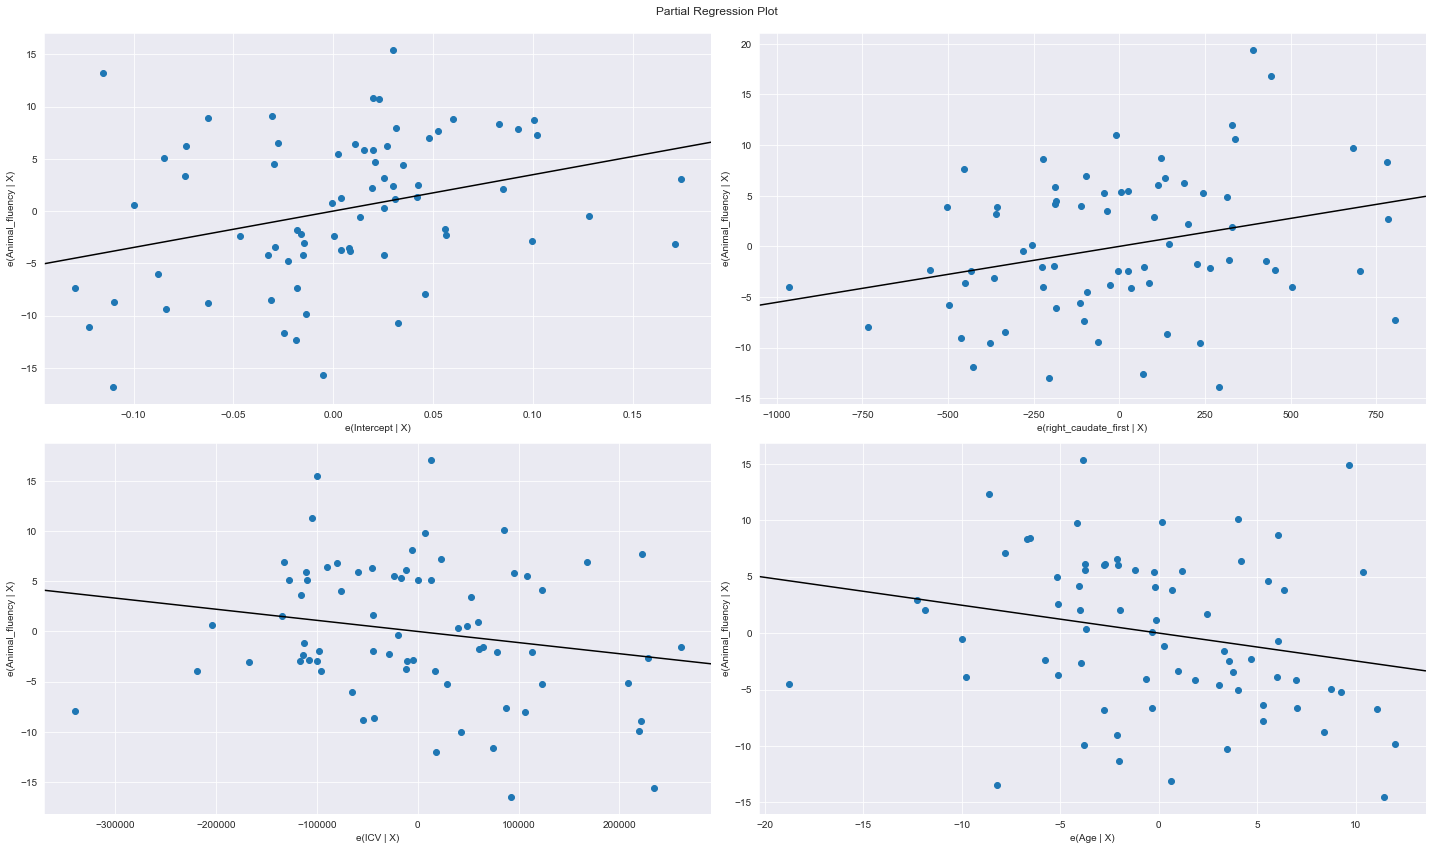

In [69]:
fig = plt.figure(figsize=(20, 12))

fig = sm.graphics.plot_partregress_grid(model, fig=fig)

Here we can see that our model shows that caudate volumes, ICV and Age can predict performance on the animal fluency test.